In [25]:
import numpy as np
import sys 
import seaborn as sns
import scipy

In [26]:
class VariableAleatoria():
    
    def __init__(self,seed=123,values=np.array([]), distribution='', params= [],method=''):
        self.seed= seed
        self.values= values
        self.distribution=distribution
        self.method= method
        self.params=params
        self.C= 0
        self.g= {"normal": 1,
                 "beta": 1,
                 "gamma": 2,
                 "argus": 1,
                 "wald": 1}
        self.aceptacion={
                   "normal": lambda x: scipy.stats.norm.pdf(x, loc= self.params[0], scale=self.params[1])/np.exp(-x),
                   "beta": lambda x: scipy.stats.beta.pdf(x,a=self.params[0],b=self.params[1])/ np.exp(-x),
                   "gamma": lambda x: scipy.stats.gamma.pdf(x,a=self.params[0])/ 2*np.exp(-2*x),
                    "argus":lambda x: scipy.stats.argus.pdf(x,chi=self.params[0])/ np.exp(-x),
                    "wald": lambda x: scipy.stats.wald.pdf(x)/ np.exp(-x)}
        self.inversa= {"exponencial": '-np.log(u)/self.params[0]',
                       "anglit": 'np.arcsin(2*u-1)/2',
                       "logistic": ('np.log((1/(.5-ui))-1)','-np.log(-(1/(.5-ui))-1)'),
                       "bradford": '((1+self.params[0])**u)/self.params[0] -1',
                       "pareto": "(1-u)**(1/(-1*self.params[0]))"
                      }
        self.isSimetric= {"exponencial": 0,"anglit": 0,"logistic":1,"bradford": 0,'pareto':0,
                          'normal': 1, 'beta': 0, "gamma": 0, "argus": 0, "wald":0}
        
    def generateInv(self,n):
        '''El método de la inversa esta implementado las distribuciones: 
           Exponencial, Anglit, Logistic, Bradford, Pareto. '''
        u= np.random.uniform(size=n)
        if(self.isSimetric[self.distribution]):
            ls=[]
            for ui in u:
                if(ui<.5):
                    x= (eval(self.inversa[self.distribution][0])) 
                else:
                    x= (eval(self.inversa[self.distribution][1]))
                ls.append(x)
            self.values= np.array(ls)
            
        else:
            x= (eval(self.inversa[self.distribution]))
            self.values= x
        sns.displot(self.values)
        return self.values
    def getC(self):
        ini=0
        if(self.distribution== 'wald'):
            ini=1
        max_x = scipy.optimize.fmin(lambda x: -1*self.aceptacion[self.distribution](x), ini)
        return self.aceptacion[self.distribution](max_x)[0]
    
    def generateAcep(self,n):
        '''El método de aceptación y rechazo esta implementado para las distribuciones: 
           Normal, Beta, Gamma, Argus, Wald.
           Se recomienda primero usar getC para ver la constante, entre mayor sea el número más rápido se generará '''
        ls=[]
        self.C= self.getC()
        
        while(len(ls)<n):
            u= np.random.uniform(size=1)
            y= np.random.exponential(scale=self.g[self.distribution])
            h = self.aceptacion[self.distribution](y)*(1/self.C)
            if(u<=h):
                if(self.isSimetric[self.distribution]==1):
                    u2=  np.random.uniform(size=1)
                    if(u2<=.5):
                        ls.append(y)
                    else:
                        ls.append(-y)
                else:
                    ls.append(y)
        self.values= np.array(ls)
        sns.displot(self.values)
        return self.values
            
        

In [27]:
X=VariableAleatoria(distribution='wald',params=[3])

In [28]:
print(X.generateAcep.__doc__)

El método de aceptación y rechazo esta implementado para las distribuciones: 
           Normal, Beta, Gamma, Argus, Wald.
           Se recomienda primero usar getC para ver la constante, entre mayor sea el número más rápido se generará 


In [29]:
X.getC()

Optimization terminated successfully.
         Current function value: -1.501798
         Iterations: 15
         Function evaluations: 30


1.5017978381807868

In [30]:
print(X.generateInv.__doc__)

El método de la inversa esta implementado las distribuciones: 
           Exponencial, Anglit, Logistic, Bradford, Pareto. 


Optimization terminated successfully.
         Current function value: -1.501798
         Iterations: 15
         Function evaluations: 30


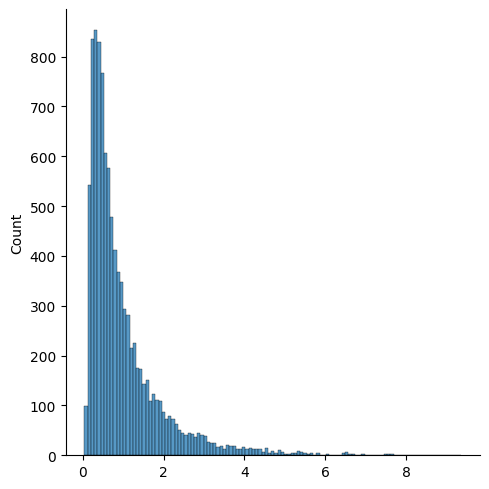

In [31]:
a= X.generateAcep(10000)

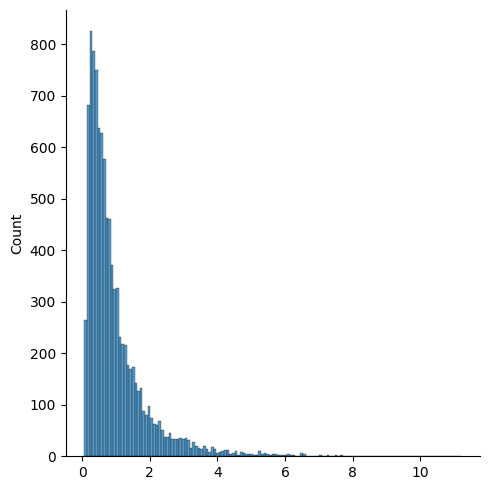

In [32]:
sns.displot(scipy.stats.wald.rvs( size= 10000))